# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [1]:
DATA_FOLDER = 'Data' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

In [2]:
%matplotlib inline
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [3]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [4]:
f = DATA_FOLDER+'/titanic.xls'
titanicRaw = pd.read_excel(f)
titanic = titanicRaw.copy()
titanic.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


### Question 1
Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 

### Answer
First of all, we get the type of each attribute as well as general information of the table.

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


Then, we examine every attribute to show its value range and to see if it can be categorical.

In [6]:
for attribute in titanic.columns:
    print(str(attribute)+ ":\n" + str(pd.Categorical(titanic[attribute])) + "\n")

pclass:
[1, 1, 1, 1, 1, ..., 3, 3, 3, 3, 3]
Length: 1309
Categories (3, int64): [1, 2, 3]

survived:
[1, 1, 0, 0, 0, ..., 0, 0, 0, 0, 0]
Length: 1309
Categories (2, int64): [0, 1]

name:
[Allen, Miss. Elisabeth Walton, Allison, Master. Hudson Trevor, Allison, Miss. Helen Loraine, Allison, Mr. Hudson Joshua Creighton, Allison, Mrs. Hudson J C (Bessie Waldo Daniels), ..., Zabour, Miss. Hileni, Zabour, Miss. Thamine, Zakarian, Mr. Mapriededer, Zakarian, Mr. Ortin, Zimmerman, Mr. Leo]
Length: 1309
Categories (1307, object): [Abbing, Mr. Anthony, Abbott, Master. Eugene Joseph, Abbott, Mr. Rossmore Edward, Abbott, Mrs. Stanton (Rosa Hunt), ..., van Billiard, Master. James William, van Billiard, Master. Walter John, van Billiard, Mr. Austin Blyler, van Melkebeke, Mr. Philemon]

sex:
[female, male, female, male, female, ..., female, female, male, male, male]
Length: 1309
Categories (2, object): [female, male]

age:
[29.0000, 0.9167, 2.0000, 30.0000, 25.0000, ..., 14.5, NaN, 26.5, 27.0, 29.0]
L

As we can see, there are many attributes that can be categorical but only a few that **we would probably use in later questions**, which are *pclass*, *survived*, *sex* and *embarked*. Here, we only make these four attributes categorical.

For *pclass*, we use *1st class*, *2nd class*, *3rd class* instead of numbers.

In [7]:
titanic['pclass'] = titanic.pclass.astype('category')
titanic.pclass.cat.categories = ['1st class', '2nd class','3rd class']

For *survived*, we use *Not Survived* and *Survived* instead of 0 and 1.

In [8]:
titanic['survived'] = titanic.survived.astype('category')
titanic.survived.cat.categories = ["Not Survived", "Survived"]

For *sex*, we just use *female* and *male*.

In [9]:
titanic['sex'] = titanic.sex.astype('category')

For *embarked*, we replace all NaN values to *Unkown* and use *Cherbourg*, *Queenstown*, *Southampton* instead of single letter.

In [10]:
titanic.embarked = titanic.embarked.fillna('Unknown')
titanic['embarked'] = titanic.embarked.astype('category')
titanic.embarked.cat.categories = ["Cherbourg", "Queenstown", "Southampton", 'Unknown']

Drop all unwanted columns and show the final table and the type of each attribute.

In [11]:
titanic = titanic.drop(['name','sibsp','parch','ticket','fare','boat','body','home.dest'], axis=1)

In [12]:
titanic.head()

,pclass,survived,sex,age,cabin,embarked
0,1st class,Survived,female,29.0000,B5,Southampton
1,1st class,Survived,male,0.9167,C22 C26,Southampton
2,1st class,Not Survived,female,2.0000,C22 C26,Southampton
3,1st class,Not Survived,male,30.0000,C22 C26,Southampton
4,1st class,Not Survived,female,25.0000,C22 C26,Southampton


In [13]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 6 columns):
pclass      1309 non-null category
survived    1309 non-null category
sex         1309 non-null category
age         1046 non-null float64
cabin       295 non-null object
embarked    1309 non-null category
dtypes: category(4), float64(1), object(1)
memory usage: 26.1+ KB


### Question 2
Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 

### Answer
Plot bar chart for the *travel class* attribute.

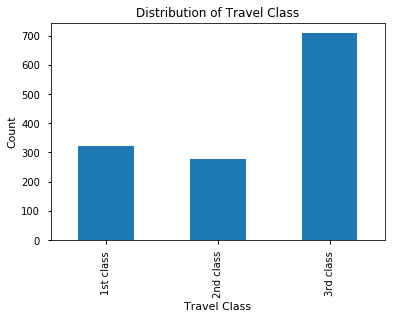

In [14]:
titanic.groupby(['pclass']).size().plot(kind='bar')
plt.title("Distribution of Travel Class", fontsize=12)
plt.ylabel('Count')
plt.xlabel('Travel Class')

Plot bar chart for the *embarkation port* attribute.

Here we also have **Unknown** port for those whose value of the *embarked* attribute is NaN in the original table.

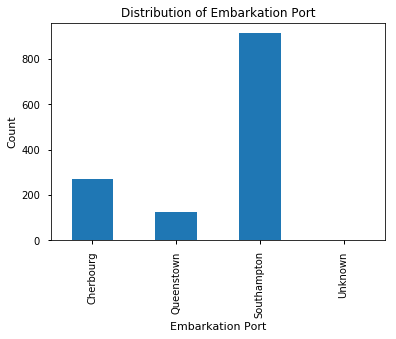

In [15]:
titanic.groupby(['embarked']).size().plot(kind='bar')
plt.title("Distribution of Embarkation Port", fontsize=12)
plt.ylabel('Count')
plt.xlabel('Embarkation Port')

Plot bar chart for the *sex* attribute.

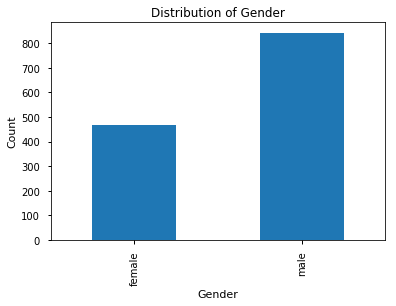

In [16]:
titanic.groupby(['sex']).size().plot(kind='bar')
plt.title("Distribution of Gender", fontsize=12)
plt.ylabel('Count')
plt.xlabel('Gender')

Plot bar chart for the *age* attribute. 

Here, we make two assumptions:
1. We drop all NaN values. We think they are meaningless.
2. All values with a decimal point are correct. The decimal part may mean the months.

And from question 1, we know that the value range of age is from 0.1667 to 80. So we build 8 groups.

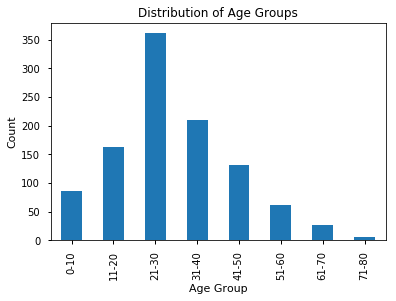

In [17]:
# drop the NaN columns
titanic_age = titanic[titanic.age.notnull()]
# cut the table into eight age groups
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
titanic_age['age_group'] = pd.cut(titanic_age.age, range(0, 81, 10), right=True, labels=age_labels)
# plot
titanic_age.groupby(['age_group']).size().plot(kind='bar')
plt.title("Distribution of Age Groups", fontsize=12)
plt.ylabel('Count')
plt.xlabel('Age Group')

### Question 3
Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.

### Answer
Plot pie chart for the proportion of passengers by cabin floor.

In order to get the cabin floor of each person, we make three assumptions here:
1. There are 8 different cabin floor, A, B, C, D, E, F, G and T.
2. All NaN values are meaningless so we drop them all in this question.
2. Only the first letter in the *cabin* attribute makes sense. e.g. Someone has "F E12" in his *cabin* value. He may bought both F and E cabin floors but only lived in the F floor. So we only care the first letter.

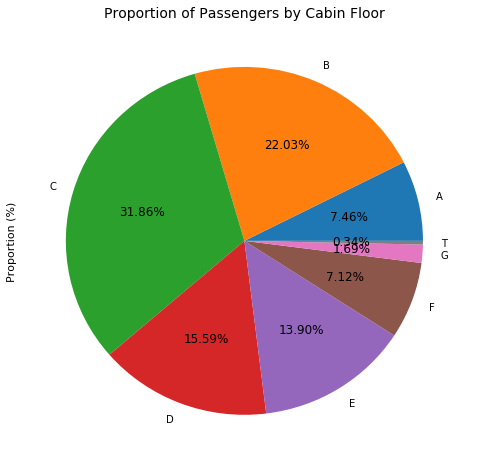

In [18]:
# drop NaN value
deck = titanic['cabin'].dropna()
levels = []
for level in deck:
    levels.append(level[0]) # take the 1st letter in 'cabin' as the floor
cabin = pd.DataFrame(levels)
cabin.columns = ['Cabin']
# calculate the proportion by percentage
cabin_count = pd.DataFrame(cabin['Cabin'].value_counts(normalize=True) * 100)
cabin_count.columns = ['Proportion (%)']
cabin_count.sort_index().plot(kind='pie',autopct='%.2f%%',subplots=True,figsize=(8,8),legend=False)
plt.title("Proportion of Passengers by Cabin Floor", fontsize=14)

### Question 4
For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie chart*.

### Answer
Plot pie charts for the proportion of survivors in different classes.

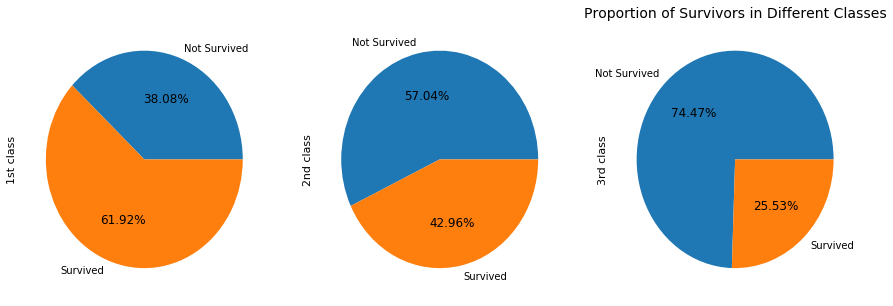

In [19]:
class_survived = titanic.groupby(['pclass']).survived.value_counts().unstack().T
class_survived.plot.pie(autopct = '%.2f%%', subplots=True, legend=False, figsize=(15,5))
plt.title("Proportion of Survivors in Different Classes", fontsize=14)

As the charts show, people who were in a higher class had a better chance of surviving the shipwreck than those who stayed in a lower class. 

That's cruel but true!

### Question 5
Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.

### Answer
Calculate the proportion of the survivors by travel class and sex. We plot the table in two different ways.

In [20]:
temp = titanic.groupby(['pclass','sex']).survived.value_counts()
temp = temp.unstack()
temp['Proportion (%)'] = temp['Survived']/(temp['Survived']+temp['Not Survived'])*100
temp = temp.drop(['Not Survived','Survived'], axis=1)
class_sex_survived = temp.unstack()
class_sex_survived.columns = ['female','male']
class_sex_survived.index.name = ''
class_sex_survived

,female,male
,,
1st class,96.527778,34.078212
2nd class,88.679245,14.619883
3rd class,49.074074,15.212982


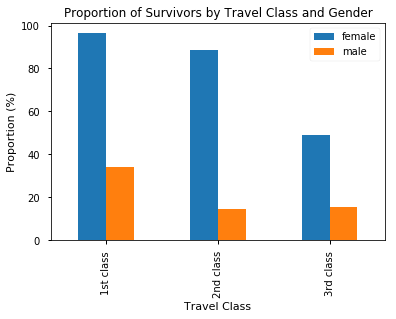

In [21]:
class_sex_survived.plot.bar()
plt.title("Proportion of Survivors by Travel Class and Gender", fontsize=12)
plt.ylabel('Proportion (%)')
plt.xlabel('Travel Class')

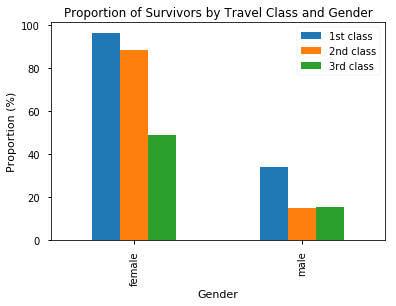

In [22]:
class_sex_survived.T.plot.bar()
plt.title("Proportion of Survivors by Travel Class and Gender", fontsize=12)
plt.ylabel('Proportion (%)')
plt.xlabel('Gender')

As two charts show, people in higher class have high survival probability. 

More importantly, there are more female survivors than male survivors and it's true in all three classes. The female survival probability in the 1st and 2nd classes is over 80%. Even in the 3rd class, where the overall survival probablity is lower, women still have nearly 50% chance of survival. 

These two charts tell us a warm fact that in the crisis of Titanic, gentlemen let ladies go first.

### Question 6
Create 2 equally populated age categories and calculate survival proportions by age category, travel class and sex. Present your results in a DataFrame with unique index.

### Answer
First, we need to build two equally populated age categories. One intuitive idea is to find the median value.

In [23]:
# drop the NaN columns
titanic_age = titanic[titanic.age.notnull()]

In [24]:
# calculate the median value of age
med_age = titanic_age.age.median()
med_age

28.0

In [25]:
you_df = titanic_age[titanic_age.age<med_age]
med_df = titanic_age[titanic_age.age==med_age]
old_df = titanic_age[titanic_age.age>med_age]

In [26]:
num_you = len(you_df)
print("{} people's ages are younger than median".format(num_you))
num_med = len(med_df)
print("{} people's ages are in median".format(num_med))
num_old = len(old_df)
print("{} people's ages are older than median".format(num_old))

504 people's ages are younger than median
32 people's ages are in median
510 people's ages are older than median


The number of people who are in 28 years old is 32 and we need to randomly put these 32 people in two groups. In order to get two equally populated groups, we put 19 together with the younger group and 13 together with the older group. 

To implement this random assignment, here we use a mask and *numpy.random.shuffle( )* method.

In [27]:
mask1 = [True]*19+[False]*13
np.random.shuffle(mask1)
mask2 = [not i for i in mask1]

In [28]:
g1 = pd.merge(you_df, med_df[mask1],how='outer')
g2 = pd.merge(old_df, med_df[mask2],how='outer')

Print and see the number of people in 2 groups.

In [29]:
print("{} people are in group 1".format(len(g1)))
print("{} people are in group 2".format(len(g2)))

523 people are in group 1
523 people are in group 2


Calculate the survival proportion and merge two dataframes together.

In [30]:
def calculate_survival_prop(df):
    temp = df.groupby(['pclass','sex']).survived.value_counts()
    temp = temp.unstack()
    temp['Proportion (%)'] = temp['Survived']/(temp['Survived']+temp['Not Survived'])*100
    temp = temp.drop(['Not Survived','Survived'], axis=1)
    return temp

In [31]:
gg1 = calculate_survival_prop(g1)
gg1.columns=['% of survivors age_group1']

In [32]:
gg2 = calculate_survival_prop(g2)
gg2.columns=['% of survivors age_group2']

In [33]:
gg = pd.merge(gg1,gg2,left_index=True,right_index=True)

Test if the index is unique.

In [34]:
gg.index.is_unique

True

Show the final result.

In [35]:
gg

% of survivors age_group1  % of survivors age_group2
pclass    sex                                                         
1st class female                  95.121951                  96.739130
          male                    51.612903                  30.833333
2nd class female                  90.566038                  88.000000
          male                    22.535211                   8.045977
3rd class female                  51.851852                  36.363636
          male                    18.721461                  13.846154